# SOK-1006 V23

## Forelesning 7 - Produksjon: Teknologi

### 1. Forutsetninger

Vi forutsetter følgende om bedriftene som vi analysere:

- Bedriften produserer ett homogent produkt
- Produksjonen kan måles
- Bedriften bruker to produksjonsfaktorer (arbeidskraft og kapital)
- Produksjonsfaktorer er homogene, målbare, og har faste gitt priser
- Forholdet mellom innsatsfaktorer og ferdigprodukt representeres med en produktfunksjon
- Produsenten tar produktprisen for gitt
- Produsentens mål er å maksimere fortjeneste

**Oppgave**      
*Tenk over hvor rimelig disse forutsetningene er.*

### 2. Produktfunksjonen

Generelt kan vi skrive at kvantum produsert (x) er en funksjon av alle produksjonsfaktorer brukt i prosessen. Bruker bedriften arbeidskraft (N) og kapital (K) vil produktfunksjonen være
$$ x = f(N, K).$$

På *kort sikt* vil én eller flere faktorer være fast, mens på *lang sikt* kan bedriften tilpasse alle innsatsfaktorer. La oss tenke oss at mengde kapital er fast ved nivå $K_0$ på kort sikt. Da vil produktfunksjonen på kort sikt være
$$ x = f(N, K_0).$$

Dette kan tegnes i to dimensjoner gitt verdien på kapital. Se Figur 4.1 a-b s. 121.

Utfra et gitt utgangspunkt vil *grenseproduktiviteten* måle hvor mye ekstra som produseres dersom forbruk av den variable faktoren økes:
$$\frac{\partial x}{\partial N}=f'_N > 0.$$

Vi ser at dette er et positivt tall, ettersom bedriften må produsere på en teknisk effektiv måte, dvs de vil ikke bruke mer innsatsfaktorer enn nødvendig. Fra figuren ser vi også at verdien på dette tallet blir mindre jo mer arbeidskraft som brukes. Dette er loven om avtakende grenseproduktivitet.     

Et annet viktig mål i produksjonen er hvor mye hver enhet av en innsatsfaktor produserer i gjennomsnitt, dvs *gjennomsnittsproduktiviteten* git ved
$$\frac{x}{N}=\frac{f(N,K_0)}{N}.$$

Dette måles som helningen til en stråle fra origo til et bestemt punkt på produktfunksjonen (se Fig 4.1).

#### 2.1 Et eksempel

Produksjon i en bedrift er gitt ved:   

\begin{equation}
   x=f(N,K)=K\frac{e^N}{A+e^N}\tag{1}
\end{equation}


hvor $N$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital og $A>0$ er et konstant tall.   
$e$ er Eulers tall (ca. 2,7 1828 1828). På kort sikt er $K=1000$, og $A=200$.   
Vi skal tegne produktfunksjonen på kort sikt for $10\geq N\geq 1$.   


In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symboler
N, A = sp.symbols('N A', positive=True, real=True)

Vi har med en eksponensialfunksjon å gjøre. Hvis vi vil regne på denne bruker vi sympyversjonen av denne funksjonen `sp.exp()`. Hvis vi vil tegne den bruker vi numpy utgaven `np.exp()`. For å kunne definere én funksjon som veksler mellom disse to versjonene kan vi bake "type funksjon" inn i definisjonen:

In [3]:
# Vi definerer produktfn

def prod(c,N,A):
    produksjon=1000*(c.exp(N)/(A+c.exp(N)))
    return produksjon
prod(sp,N,A)

1000*exp(N)/(A + exp(N))

Variablen "c" tar verdi sp dersom vi bruker sympy utgaven, og np om vi vil bruke numpy.

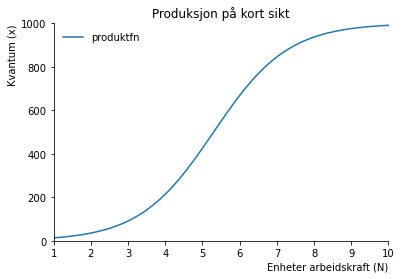

In [4]:
n=np.linspace(1,10,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kvantum (x)', loc='top')
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n, prod(np,n,200), label='produktfn')


# tittel
ax.set_title('Produksjon på kort sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);

**Oppgave**

*Beregn gjennomsnitts- og grenseproduktiviteten til arbeidskraft for produktfunksjon (1), og tegn disse i en figur. Forklar figuren. For hvilken verdi av $N$ er grenseproduktiviteten høyest?  (Hint: husk hvordan vi tegnet sympy uttrykk i matplotlib ved å bruke `sp.lambdify()` i forelesning 5).*

In [ ]:
# skriv ditt svar her

I dette eksempelet kan vi kapre *teknologisk fremgang* gjennom en reduksjon i A til for eksempel 100.

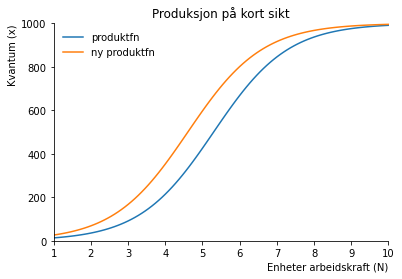

In [5]:
ax.plot(n, prod(np,n,100), label='ny produktfn')
ax.legend(loc='best',frameon=False)
fig1

Vi kan tegne økningen i produksjon for hvert nivå på N.

In [6]:
# økning i produksjon fra å ta i bruk den nye teknologien
def increase(c,N):
    return (prod(c,N,100)-prod(c,N,200))

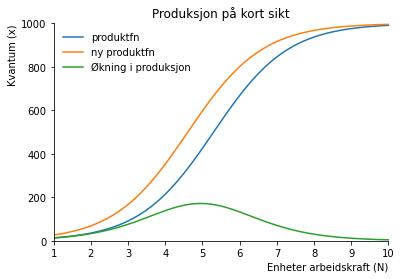

In [7]:
ax.plot(n, increase(np,n), label='Økning i produksjon')
ax.legend(loc='best',frameon=False)
fig1

Vi ser at det er et toppunkt vi kan regne på..........

In [8]:
increase_d=sp.simplify(sp.diff(increase(sp,N),N))
increase_d

100000*(20000 - exp(2*N))*exp(N)/(exp(4*N) + 600*exp(3*N) + 130000*exp(2*N) + 12000000*exp(N) + 400000000)

In [9]:
sol=sp.solve(increase_d,N)[0]
sol
# dette gir N som maksimerer produksjonssøkningen

log(100*sqrt(2))

Det kan være greit å konvertere dette til et desimaltall:

In [10]:
float(sol)

4.951743776268064

For å få størst økning fra den nye teknologien må bedriften bruke 4.95 enheter arbeidskraft. Dette gir en maksimal økning i produksjon på:

In [11]:
increase(sp,float(sol))

171.572875253810

### 3. Produksjon på lang sikt

På lang sikt kan bedriften variere begge (alle) produksjonsfaktorer. Vi kan beregne grenseproduktiviteten til begge faktorene:
$$\frac{\partial x}{\partial N}=f'_N > 0\;,\frac{\partial x}{\partial K}=f'_K > 0.$$

Produktfunksjonen viser sammenhengen mellom tre variabler (enheter ferdigprodukt, kapital og arbeidskraft). For å kunne tegne denne funksjonen i to dimensjoner må vi fastsette en verdi for én av variablene. Vi setter en fast verdi $x_0$ på produksjon og skriver
$$x_0 = f(N,K)\tag{2}$$

Likning (2) viser kombinasjoner av N og K som kan brukes for å produsere nøyaktig $x_0$ enheter ferdig produkt. Dette er med andre ord en produksjonsisokvant. Se Figur 4.3.       
La $dx_0, dN, dK$ angi små endringer i våre tre variablene. Da kan vi skrive et uttrykk for hvordan produksjonen endrer seg når vi endrer bruk av innsatsfaktorene:
$$dx_0 = f'_N dN + f'_K dK\tag{3}$$

Langs en isokvant er kvantum uendret slik at $dx_0=0$ og (3) skrives
$$ f'_K dK= -f'_N dN \Rightarrow \frac{dK}{dN}=\frac{-f'_N}{f'_K} = MTSB.$$
MTSB er den marginale tekniske substitusjonsbrøken, og dette er helningen til isokvanten. Se Figur 4.4. Tenk at $f'_N =0.9, f'_K=0.3$, slik at $MTSB =\frac{-0.9}{0.3}=-3$. Dette betyr at dersom bedriften vil øke bruken av arbeidskraft med 1 enhet, må den samtidig redusere bruken av kapital med 3 enheter for å holde produksjonen konstant.


#### 3.1 Et eksempel

En bedrift bruker følgende produktfunksjon til å lage et gode


\begin{equation}
   x = f(N,K)=N^sK^{1-s}
\end{equation}


hvor $x$ er enheter ferdigprodukt, $N$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital og $1>  s>0$ er et konstant tall.      
Vi skal beregne grenseproduktivitetene og MTSB for denne funksjonen.

In [13]:
# definer nye symboler
K, s = sp.symbols('K s', positive=True, real=True)

# definer ny produksjonsfn (Cobb-Douglas)
def prod_cd(N,K,s):
    return N**s*K**(1-s)
prod_cd(N,K,s)



K**(1 - s)*N**s

In [14]:
# grenseproduktivitet til N
mp_N=sp.simplify(sp.diff(prod_cd(N,K,s),N))
mp_N

K**(1 - s)*N**(s - 1)*s

In [15]:
# grenseproduktivitet til K
mp_K=sp.simplify(sp.diff(prod_cd(N,K,s),K))
mp_K

(N/K)**s*(1 - s)

In [23]:
# beregn MTSB
MTSB=sp.simplify(-mp_N/mp_K)
MTSB

K*s/(N*(s - 1))

Da har vi funnet $MTSB=-\frac{K}{N}\frac{s}{1-s}$.   

Her ser vi at det er to forhold som er viktig for MTSB: (i) $\frac{K}{N}$, (ii) $\frac{s}{1-s}$. Vi forventer at MTSB blir et stort negativt tall når vi bruker mye kapital i forhold til arbeidskraft, og når s er stor i forhold til 1-s. (**Hvorfor?**).      

Det er nyttig å ha et mål for hvor mye produksjonen øker når vi øker bruk av en innsatsfaktor, og et slikt mål er spesielt nyttig dersom den er uavhengig av måleenhetene. Dette får oss til å tenke på prosentvise endringer, og dermed elastisiteter. Hvor mange prosent økes mengde produsert dersom vi øker bruk av innsatsfaktor "i" med 1%? Vi kan anvende elastistitetsformelen som vi har utledet tidligere.
$$\epsilon_N=\frac{\partial x}{\partial N}\frac{N}{x}=f'_N\frac{N}{x}\;,\epsilon_K=\frac{\partial x}{\partial K}\frac{K}{x}=f'_K\frac{K}{x}.$$

**Oppgave**        
*Regn ut disse elastisitetene for produktfunksjonen i dette avsnittet.*

In [ ]:
# skriv ditt svar her

Vi kan tegne en isokvant. La oss anta $x_0=5$, dvs vi skal tegne isokvanten for 5 enheter produkt.

In [19]:
# Vi må løse isokvanten slik at det står K= .....

iso_5=sp.solve(prod_cd(N,K,s)-5,K)[0]
iso_5

N**(s/(s - 1))/5**(1/(s - 1))

Likningen som beskriver isokvanten er da $K=5^{\frac{-1}{s-1}}N^{\frac{s}{s-1}}$. (Dette kan skrives på en enklere måte). For å tegne i matplotlib kan vi lage sympy om til numpy:

In [20]:

iso_5_fn=sp.lambdify((N,s), iso_5)
iso_5_fn(N,s)

N**(s/(s - 1))/5**(1/(s - 1))

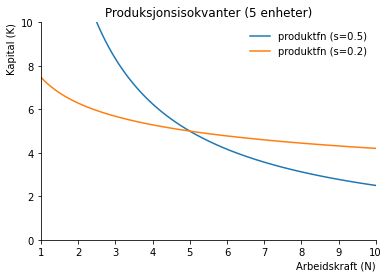

In [24]:
# La oss tegne dette for s=0.5 og s=0.2

fig2, ax = plt.subplots()
ax.set_ylabel('Kapital (K)', loc='top')
ax.set_xlabel('Arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,10))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n, iso_5_fn(n,0.5), label='produktfn (s=0.5)')
ax.plot(n, iso_5_fn(n,0.2), label='produktfn (s=0.2)')


# tittel
ax.set_title('Produksjonsisokvanter (5 enheter)')

#vis navnene:
ax.legend(loc='best',frameon=False);

### 4. Ulik grad av teknisk substitusjon

I det forrige eksempelet var graden av substituerbarhet mellom faktorene avhengig av hvor mye kapital og arbeidskraft som er i bruk. Dette er å betrakte som det vanligste tilfellet. Vi har to ytterpunkter som er ellers gitt i Fig 4.6 og 4.7 i boka.